<a href="https://colab.research.google.com/github/L40S38/DetectiveConan_graphviz/blob/main/graph_viz_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 名探偵コナンのデータセットでGraphVizの練習をしよう

In [57]:
#anacondaでインストール可能
#%conda install -c conda-forge graphviz -y
#%conda install -c conda-forge python-graphviz -y

anacondaでインストールした場合は、以下のような資料を参考に環境変数の設定を行う。
- [Anaconda環境でGraphvizを使う](https://qiita.com/nemutas/items/4f7bd96f63cf78bdb357) by @nemutas
- [Graphvizは多分condaだけでインストールできるよって話](https://qiita.com/Colonel_GTU/items/4ad7449030c9e2c23427) by Colonel_GTU

（参考）私のWindowsの場合は`C:...\anaconda3\pkgs\graphviz-{version}-{hogehoge}\Library\bin`のパスにdot.exeがありました。

コマンドラインで`dot -V`を打ってバージョン情報(`dot - graphviz version 2.50.0 (0)`など)が出てくればOK

In [58]:
#colabのときはpipでインストールすればよい。
#%pip install graphviz

In [59]:
#!git clone https://github.com/L40S38/DetectiveConan_graphviz
#%cd DetectiveConan_graphviz

## graphvizのサンプルコード

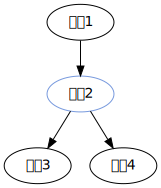

In [60]:
from graphviz import Digraph

dot = Digraph(format='png')
# フォント設定
dot.attr('node', fontname="MS Gothic")
# ノード作成
dot.node("項目1")
dot.node('項目2', color="#7799dd")
dot.node("項目3")
dot.node("項目4")
# エッジ作成
dot.edge("項目1", "項目2")
dot.edge("項目2", "項目3")
dot.edge("項目2", "項目4")
dot

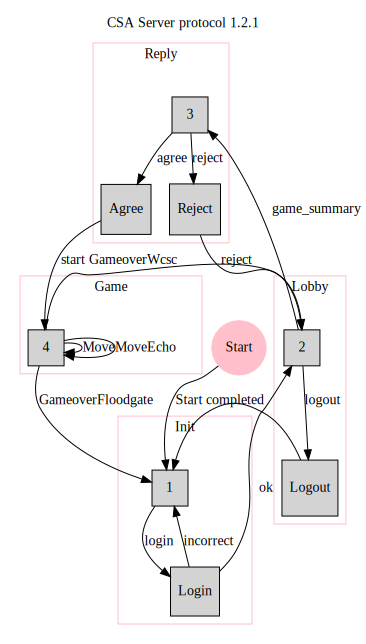

In [61]:
from graphviz import Digraph

# グラフの設定
g = Digraph(format="png")
g.attr("node", shape="square", style="filled")

# クラスター 'cluster_' から名前を始める必要あり
with g.subgraph(name='cluster_root') as c:
    # 一番外側のクラスターのラベルは図のタイトルのように見える
    c.attr(color='white', label='CSA Server protocol 1.2.1')

    # 開始ノード
    c.node("Start", shape="circle", color="pink")

    # ２つのノードと、その二間の有向な辺
    c.edge("Start", "1", label="Start")

    with c.subgraph(name='cluster_init') as c2:
        c2.attr(color='pink', label='Init')
        c2.node('1')
        c2.node('Login')
        c2.edge('1', 'Login', label='login')
        c2.edge('Login', '1', label='incorrect')

    with c.subgraph(name='cluster_lobby') as c2:
        c2.attr(color='pink', label='Lobby')
        c2.node('2')
        c2.node('Logout')
        c2.edge("2", "Logout", label="logout")

    with c.subgraph(name='cluster_reply') as c2:
        c2.attr(color='pink', label='Reply')
        c2.node('3')
        c2.node('Agree')
        c2.node('Reject')
        c2.edge("3", "Agree", label="agree")
        c2.edge("3", "Reject", label="reject")

    with c.subgraph(name='cluster_game') as c2:
        c2.attr(color='pink', label='Game')
        c2.node('4')
        c2.edge("4", "4", label="Move")
        c2.edge("4", "4", label="MoveEcho")

    c.edge("Login", "2", label="ok")
    c.edge("Logout", "1", label="completed")
    c.edge("Reject", "2", label="reject")
    c.edge("2", "3", label="game_summary")
    c.edge("Agree", "4", label="start")
    c.edge("4", "2", label="GameoverWcsc")
    c.edge("4", "1", label="GameoverFloodgate")
g

In [62]:
import glob
import pandas as pd

character_csv = glob.glob('./CaseClosed/characters/*.csv')
character_dict = dict()
for file in character_csv:
    df = pd.read_csv(file,encoding='utf-8')
    character_dict[df.columns[0]]=list(df[df.columns[0]])
character_dict

{'赤井家': ['メアリー世良', '世良真純', '羽田秀𠮷', '赤井務武'],
 '黒の組織': ['ベルモット',
  'バーボン',
  'スコッチ',
  'ジン',
  'ウォッカ',
  'キャンティ',
  'コルン',
  'キール',
  'ライ',
  '諸星大',
  'シェリー',
  'ラム'],
 '爆発物処理班': ['松田陣平', '萩原研二'],
 'CIA・本堂家': ['本堂瑛海', 'イーサン・本堂', '本堂瑛祐'],
 '少年探偵団': ['吉田歩美', '小嶋元太', '円谷光彦', '小林澄子', '若狭留美', '灰原哀', '阿笠博士'],
 '芸能界': ['水無玲奈', '沖野ヨーコ', 'クリス・ヴィンヤード', 'シャロン・ヴィンヤード', '藤峰有希子'],
 'FBI': ['赤井秀一', 'ジョディ・スターリング', 'ジェイムズ・ブラック', 'アンドレ・キャメル'],
 '群馬県警': ['山村ミサオ'],
 'いろは寿司': ['脇田兼則'],
 '神奈川県警': ['萩原千速', '横溝重悟'],
 '工藤家': ['工藤新一', '江戸川コナン', '工藤優作', '工藤有希子', '沖矢昴'],
 '黒羽家': ['黒羽盗一', '黒羽千影', '黒羽快斗'],
 '警視庁捜査一課': ['佐藤美和子', '高木渉', '千葉和伸', '白鳥任三郎', '伊達航', '目暮十三', '黒田兵衛'],
 '警視庁捜査二課': ['中森銀三', '茶木神太郎'],
 '警視庁交通部': ['三池苗子', '宮本由美'],
 '宮野家': ['宮野エレーナ', '宮野志保', '宮野明美', '宮野厚司'],
 '毛利家': ['毛利蘭', '毛利小五郎', '妃英理'],
 '長野県警': ['諸伏高明', '大和勘助', '上原由衣'],
 '大阪府警': ['遠山銀司郎', '服部平蔵', '大滝悟郎'],
 '喫茶ポアロ': ['安室透', '榎本梓'],
 '公安': ['降谷零', '諸伏景光', '風見裕也'],
 '静岡県警': ['横溝参悟'],
 'スポーツ界': ['京極真', '比護隆佑', '赤木英雄', '上村直樹', '比護隆佑', '真田貴大'],
 '鈴木

In [63]:
relations = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
relations

,character1,character2,label,vec
0,ベルモット,クリス・ヴィンヤード,同一人物,0.0
1,ベルモット,シャロン・ヴィンヤード,同一人物,0.0
2,バーボン,降谷零,同一人物,0.0
3,バーボン,安室透,同一人物,0.0
4,安室透,毛利小五郎,弟子入り,1.0
...,...,...,...,...
83,工藤有希子,黒羽盗一,弟子入り,1.0
84,藤峰有希子,工藤有希子,芸能界引退,1.0
85,毛利小五郎,沖野ヨーコ,ファン,1.0
86,鈴木園子,京極真,恋人,0.0


labelはcharacter1とcharacter2の関係性を、vecは1方向か双方向かを示している。

In [64]:
character_dict.keys()

dict_keys(['赤井家', '黒の組織', '爆発物処理班', 'CIA・本堂家', '少年探偵団', '芸能界', 'FBI', '群馬県警', 'いろは寿司', '神奈川県警', '工藤家', '黒羽家', '警視庁捜査一課', '警視庁捜査二課', '警視庁交通部', '宮野家', '毛利家', '長野県警', '大阪府警', '喫茶ポアロ', '公安', '静岡県警', 'スポーツ界', '鈴木家', '大阪・京都'])

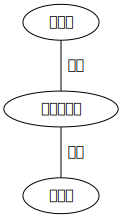

In [65]:
## 一部のキャラクターのみ表示する
import glob

characters_dot = Digraph(format='png')
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
k = '毛利家' #must be in ['黒の組織', 'FBI', 'メインキャラ', '宮野家', '警察', '大阪・京都']
for c in character_dict[k]:
    characters_dot.node(c)
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    if not c1 in character_dict[k] or not c2 in character_dict[k]:
        continue
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot

In [66]:
default_color = 'black'
same_person_color = 'lightslateblue'

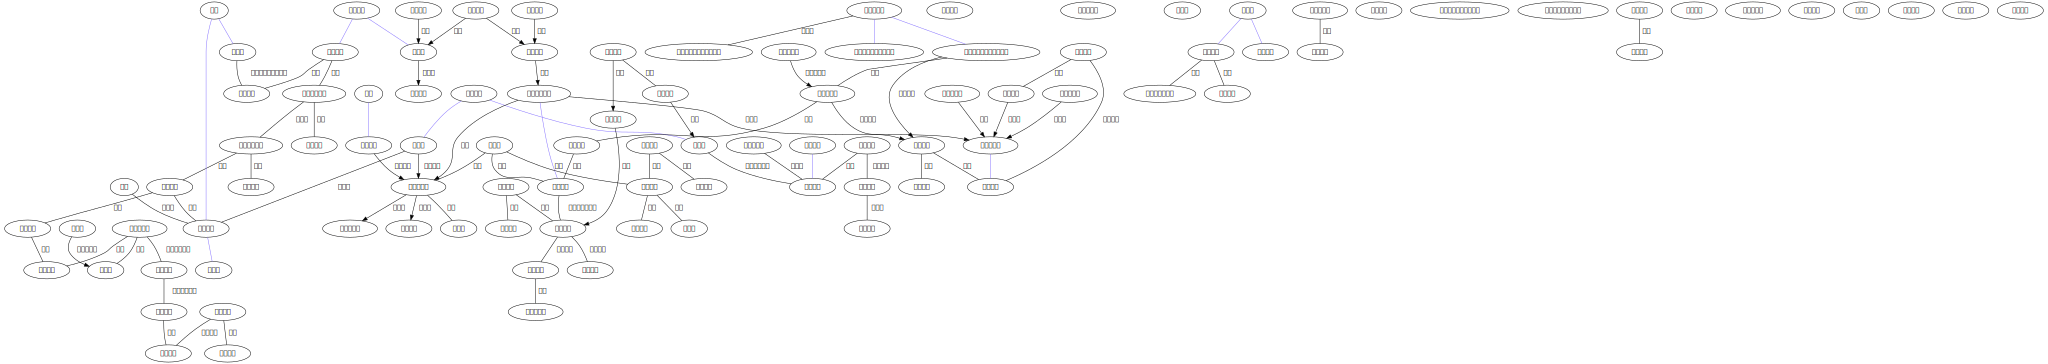

In [67]:
import glob

#グループ構造にしない
characters_dot = Digraph(format='png')
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
for k in character_dict.keys():
    for c in character_dict[k]:
        characters_dot.node(c)
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    color=default_color
    if label=='同一人物':
        color=same_person_color
        label=''
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,color=color,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot

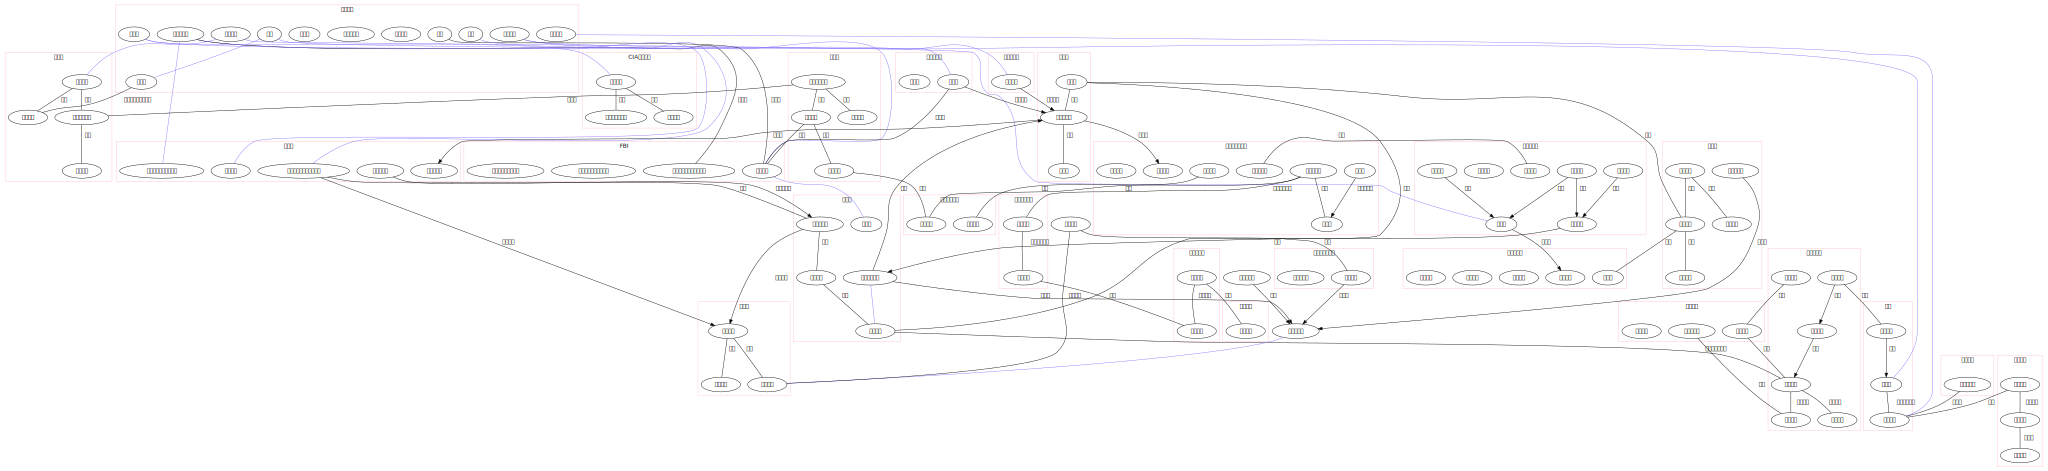

In [68]:
characters_dot = Digraph(format='png')

# must be one of ['circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi']
characters_dot.engine = "dot"
characters_dot.attr('graph', fontname="MS Gothic")
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
for k in character_dict.keys():
    with characters_dot.subgraph(name='cluster'+k) as sg:
        sg.attr(color='pink',label=k)
        for c in character_dict[k]:
            sg.node(c)
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    color=default_color
    if label=='同一人物':
        color=same_person_color
        label=''
    try:
        if df['vec'][i]==0:#双方向
            characters_dot.edge(c1,c2,label=label,color=color,dir='none')
        else:#1方向
            characters_dot.edge(c1,c2,label=label)
    except:
        print(f'edge construct error: {c1,c2,label}')
characters_dot

In [69]:
characters_dot.render('DetectiveConan_characters_graph') #画像の保存

'DetectiveConan_characters_graph.png'

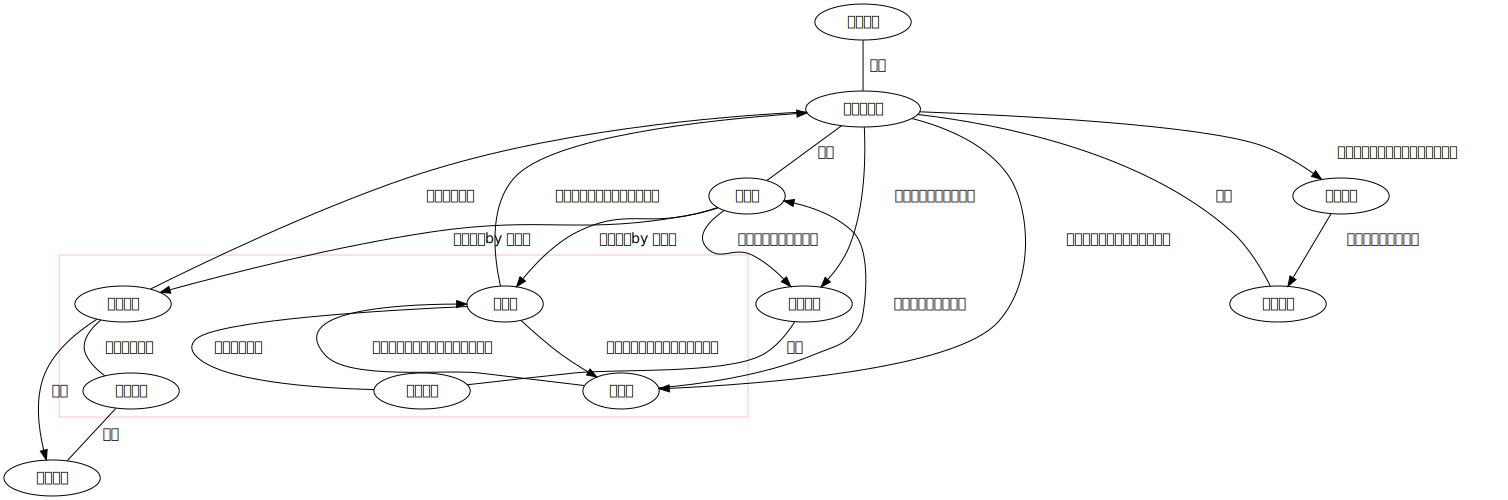

In [74]:
#Wild Police Story関連
from graphviz import Digraph
import pandas as pd
import glob

character_csv = glob.glob('./WildPoliceStory/characters/*.csv')
character_dict = dict()
for file in character_csv:
    df = pd.read_csv(file,encoding='utf-8')
    character_dict[df.columns[0]]=list(df[df.columns[0]])

characters_dot = Digraph(format='png')

# must be one of ['circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi']
characters_dot.engine = "dot"
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")

for k in character_dict.keys():
    with characters_dot.subgraph(name='cluster'+k) as sg:
        sg.attr(color='pink',label=k)
        for c in character_dict[k]:
            sg.node(c)

df = pd.read_csv('./WildPoliceStory/relations.csv',encoding='utf-8')
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot